In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv('dataset.csv')
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [3]:
#1 a. Number of Instances

print("Number of Instances:", df.shape[0])

Number of Instances: 100000


In [4]:
#1 b. Number of Features

print("Number of Features:", len(df.drop(columns= 'classification').columns))

Number of Features: 34


In [5]:
#1 c. Number of instances from each class (malware/benign)

print("Number of instances from each class:", df['classification'].value_counts())

Number of instances from each class: classification
malware    50000
benign     50000
Name: count, dtype: int64


In [6]:
#Checking Datatypes for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [7]:
#Check for Null Values

df.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [8]:
#Check for Duplicates

df.duplicated().sum()

0

In [9]:
#check number of rows and columns

df.shape

(100000, 35)

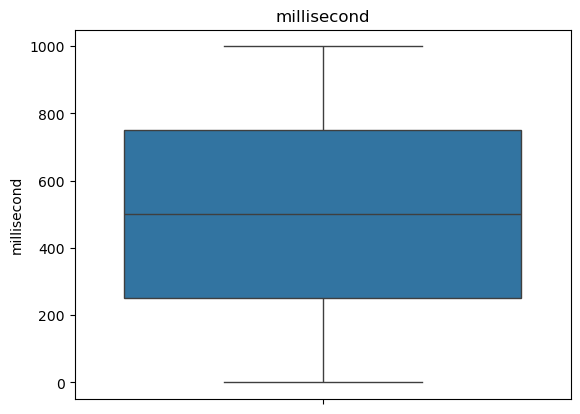

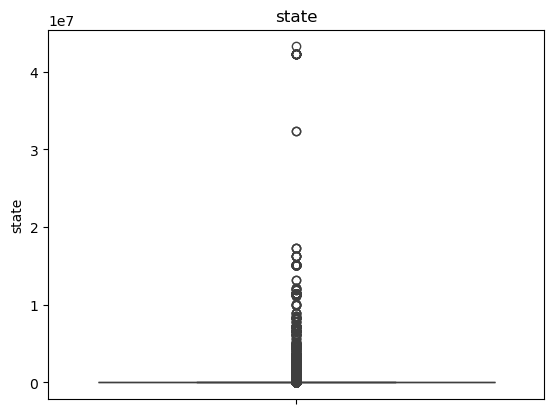

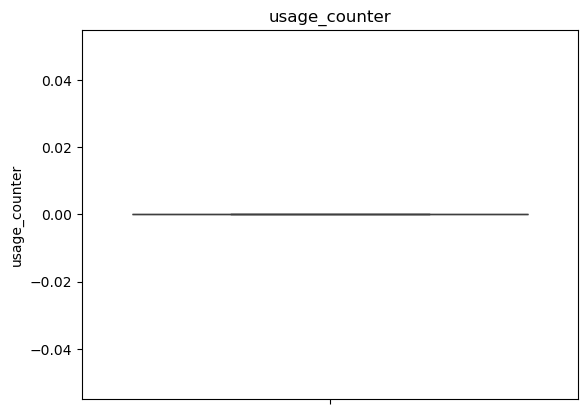

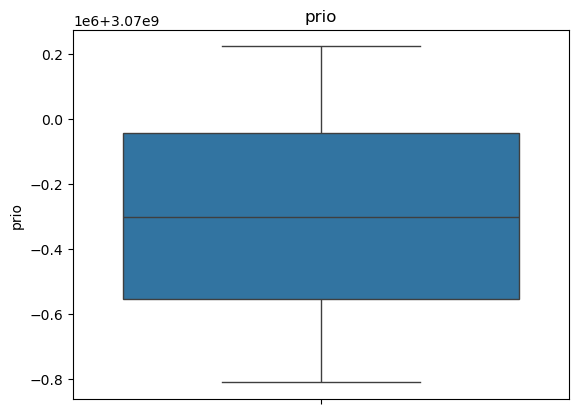

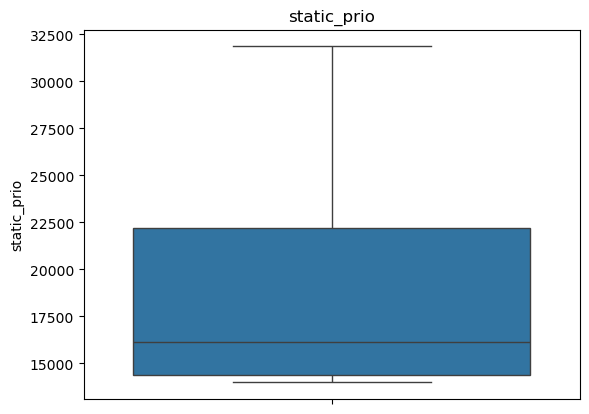

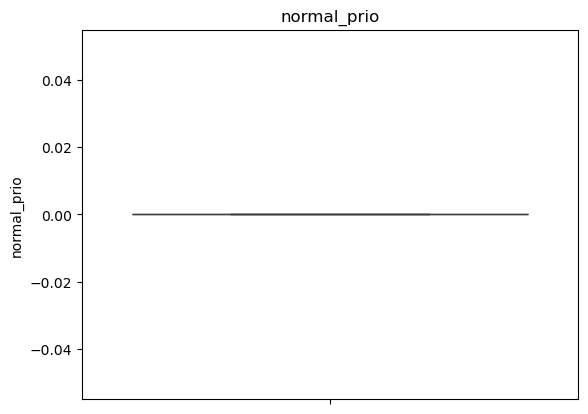

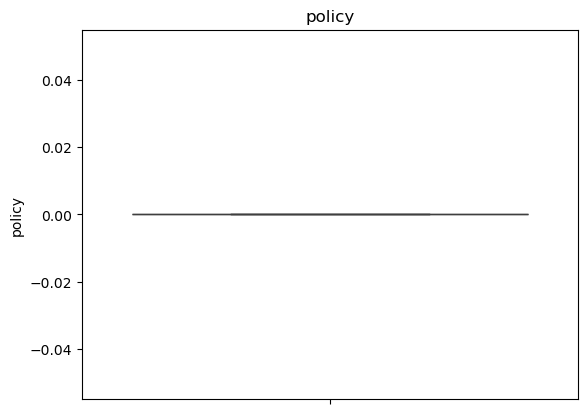

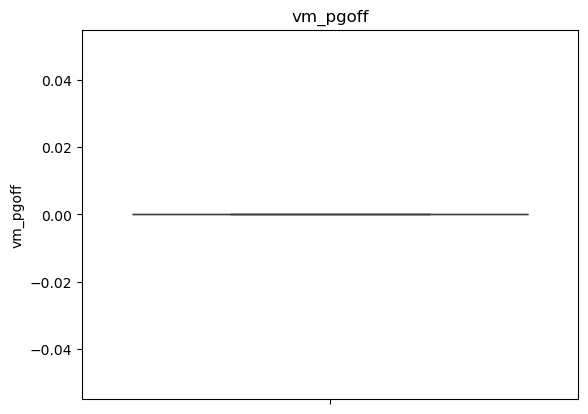

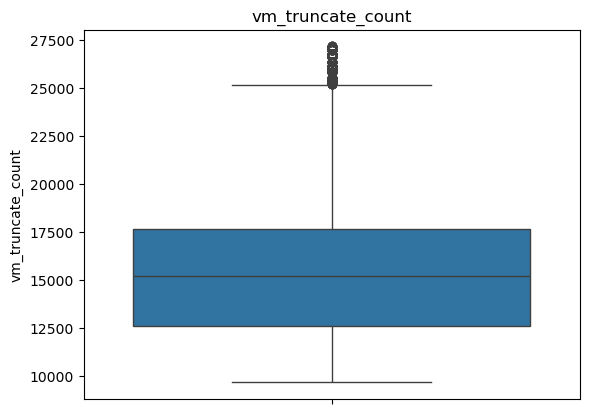

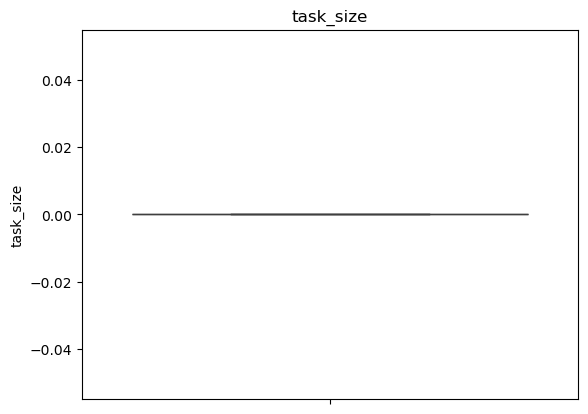

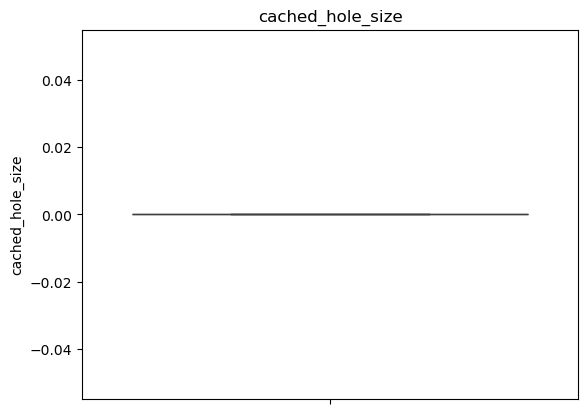

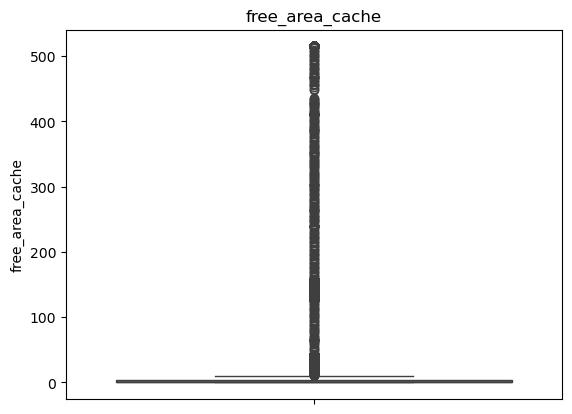

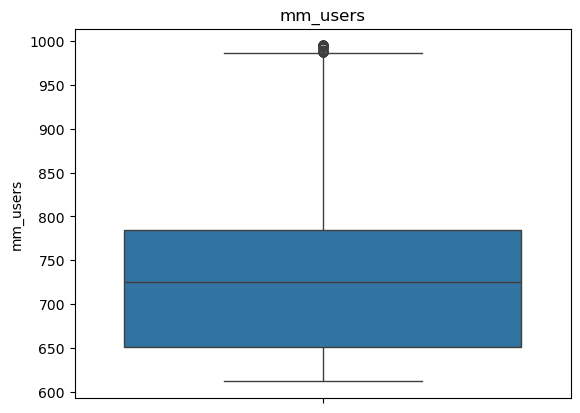

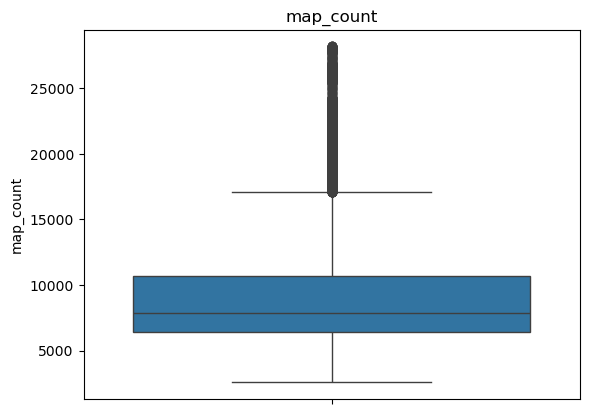

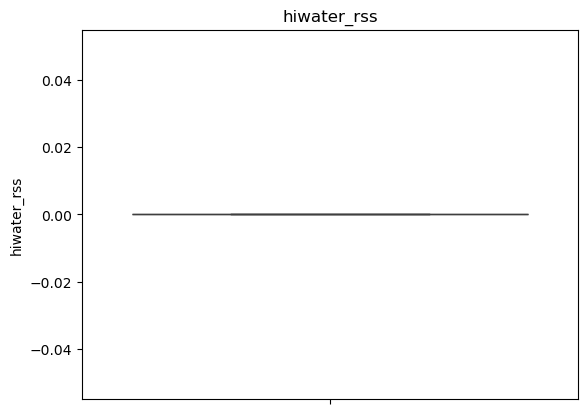

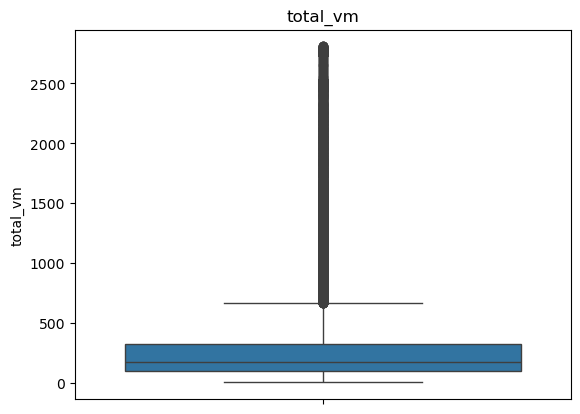

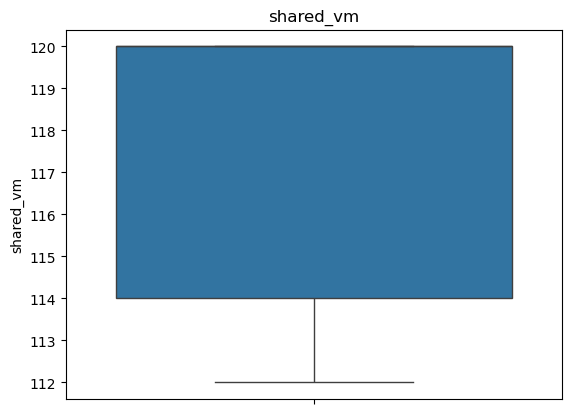

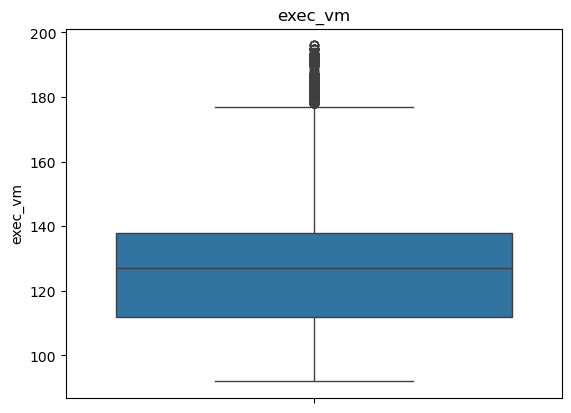

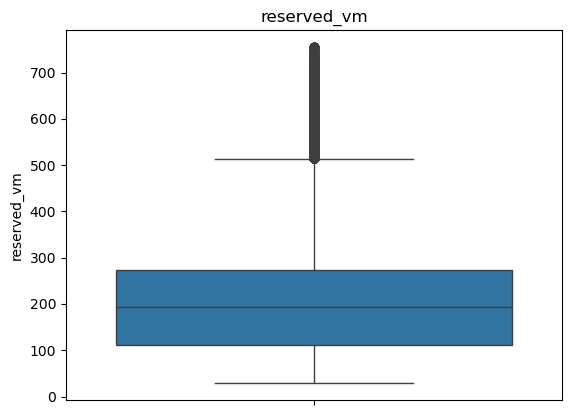

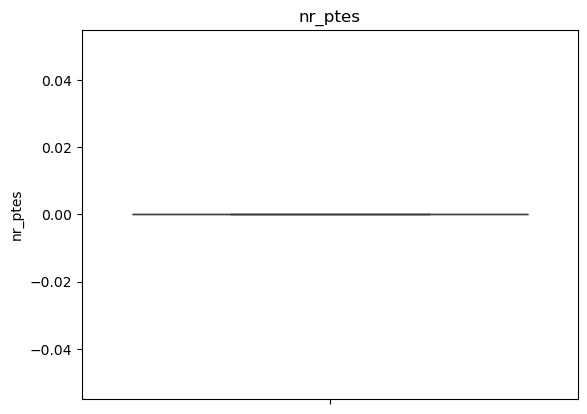

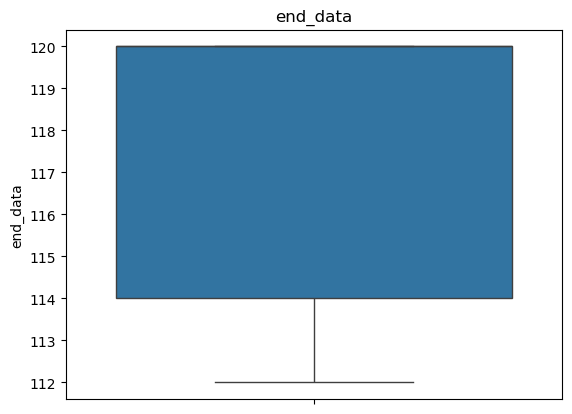

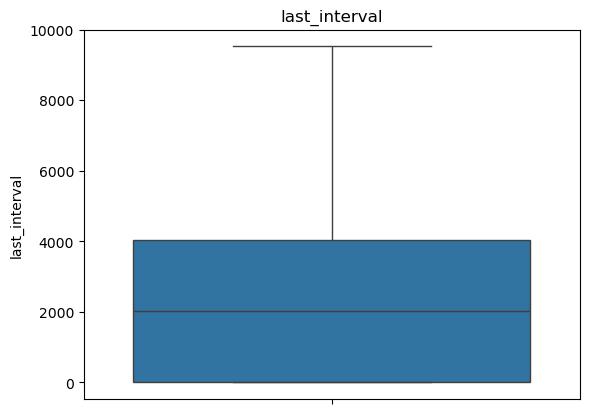

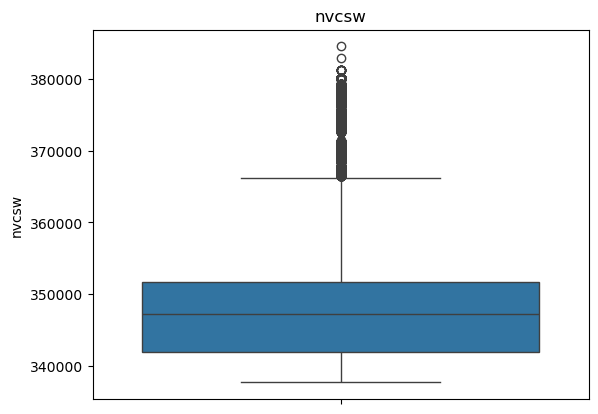

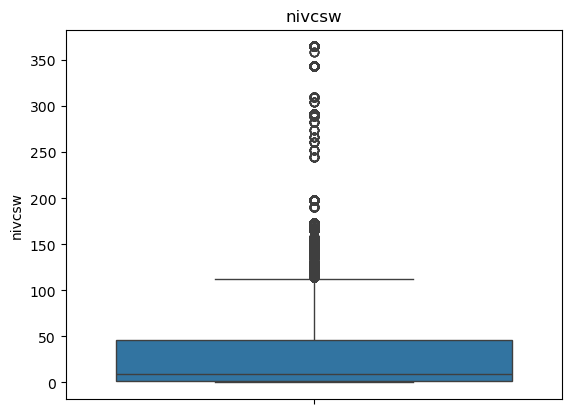

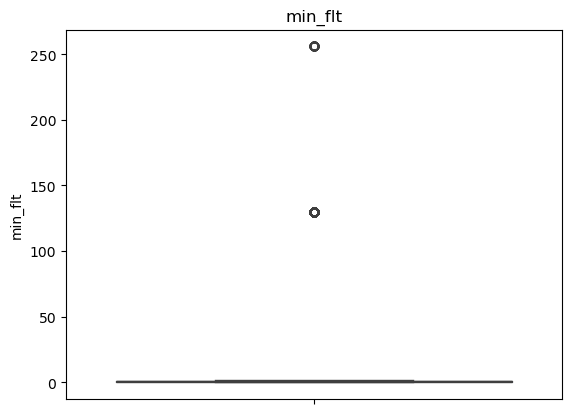

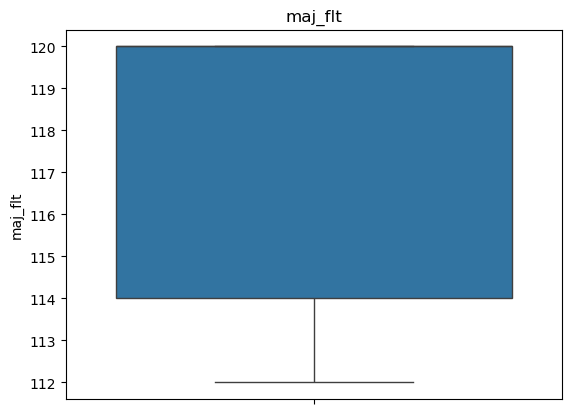

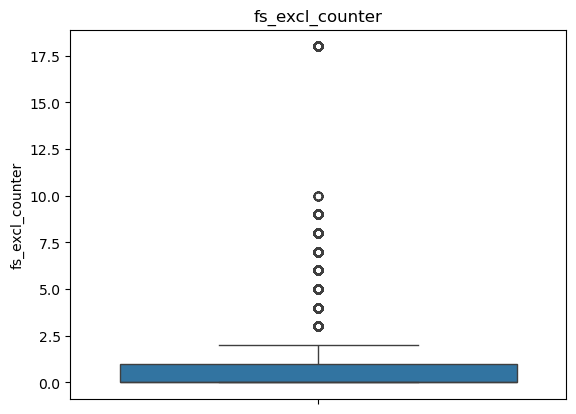

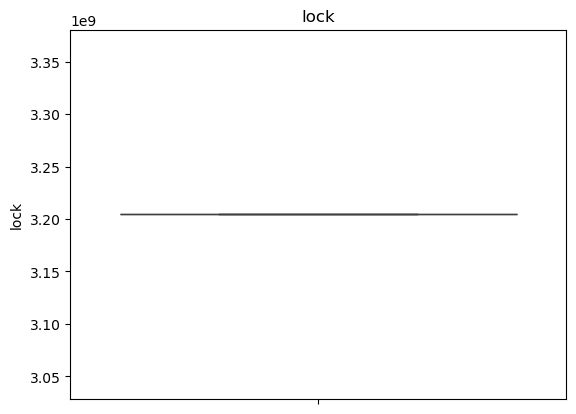

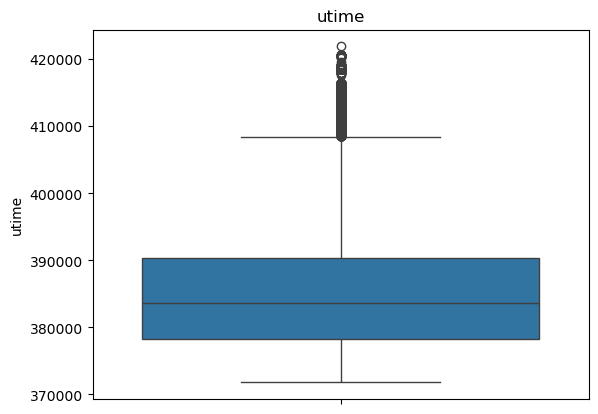

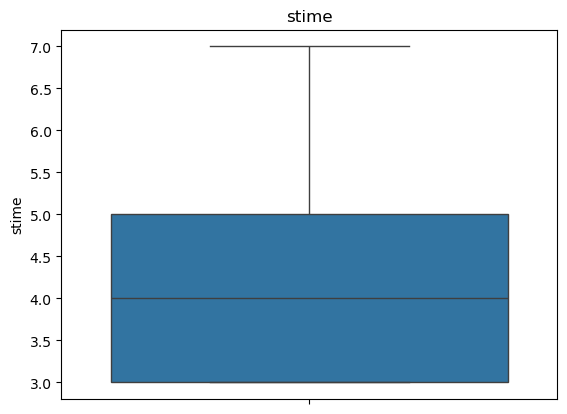

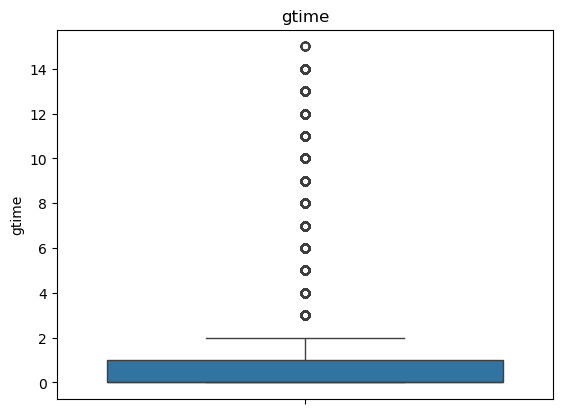

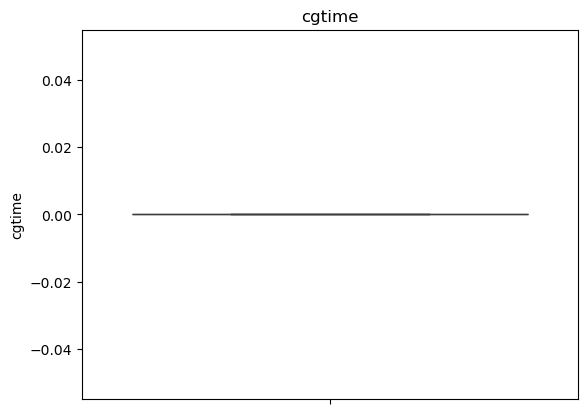

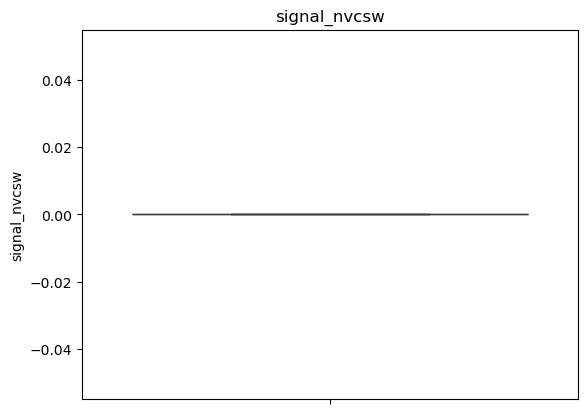

In [10]:
#Checking Outliers

for i in df.columns:
  if df[i].dtypes != object:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [11]:
#Removing Outliers

col_names=['vm_truncate_count','mm_users','map_count', 'total_vm', 'exec_vm','reserved_vm','nvcsw','nivcsw', 'utime','gtime','fs_excl_counter']

for i in col_names:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Apply IQR filtering to remove outliers
    df = df[(df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 * IQR)]

In [12]:
#Statistical summary of the data
df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,64377.000000,6.437700e+04,64377.0,6.437700e+04,64377.000000,64377.0,64377.0,64377.0,64377.000000,64377.0,...,64377.000000,64377.000000,64377.000000,64377.000000,6.437700e+04,64377.000000,64377.000000,64377.000000,64377.0,64377.0
mean,438.780465,1.645184e+05,0.0,3.069696e+09,16819.058701,0.0,0.0,0.0,14145.375864,0.0,...,9.622319,2.038803,118.822188,0.321932,3.204448e+09,381596.654613,3.863212,0.231698,0.0,0.0
std,286.051173,9.110877e+05,0.0,3.090640e+05,3104.573089,0.0,0.0,0.0,2952.416552,0.0,...,15.717419,13.410203,2.523524,0.581964,0.000000e+00,7557.206512,0.810425,0.467038,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.000000,0.0,0.0
25%,188.000000,0.000000e+00,0.0,3.069411e+09,14207.000000,0.0,0.0,0.0,11776.000000,0.0,...,0.000000,0.000000,120.000000,0.000000,3.204448e+09,375271.000000,3.000000,0.000000,0.0,0.0
50%,407.000000,0.000000e+00,0.0,3.069657e+09,15521.000000,0.0,0.0,0.0,13858.000000,0.0,...,2.000000,1.000000,120.000000,0.000000,3.204448e+09,381534.000000,4.000000,0.000000,0.0,0.0
75%,674.000000,4.096000e+03,0.0,3.069968e+09,19389.000000,0.0,0.0,0.0,16103.000000,0.0,...,15.000000,1.000000,120.000000,1.000000,3.204448e+09,385966.000000,5.000000,0.000000,0.0,0.0
max,999.000000,1.631437e+07,0.0,3.070222e+09,26713.000000,0.0,0.0,0.0,24263.000000,0.0,...,109.000000,256.000000,120.000000,2.000000,3.204448e+09,404303.000000,6.000000,2.000000,0.0,0.0


<Axes: >

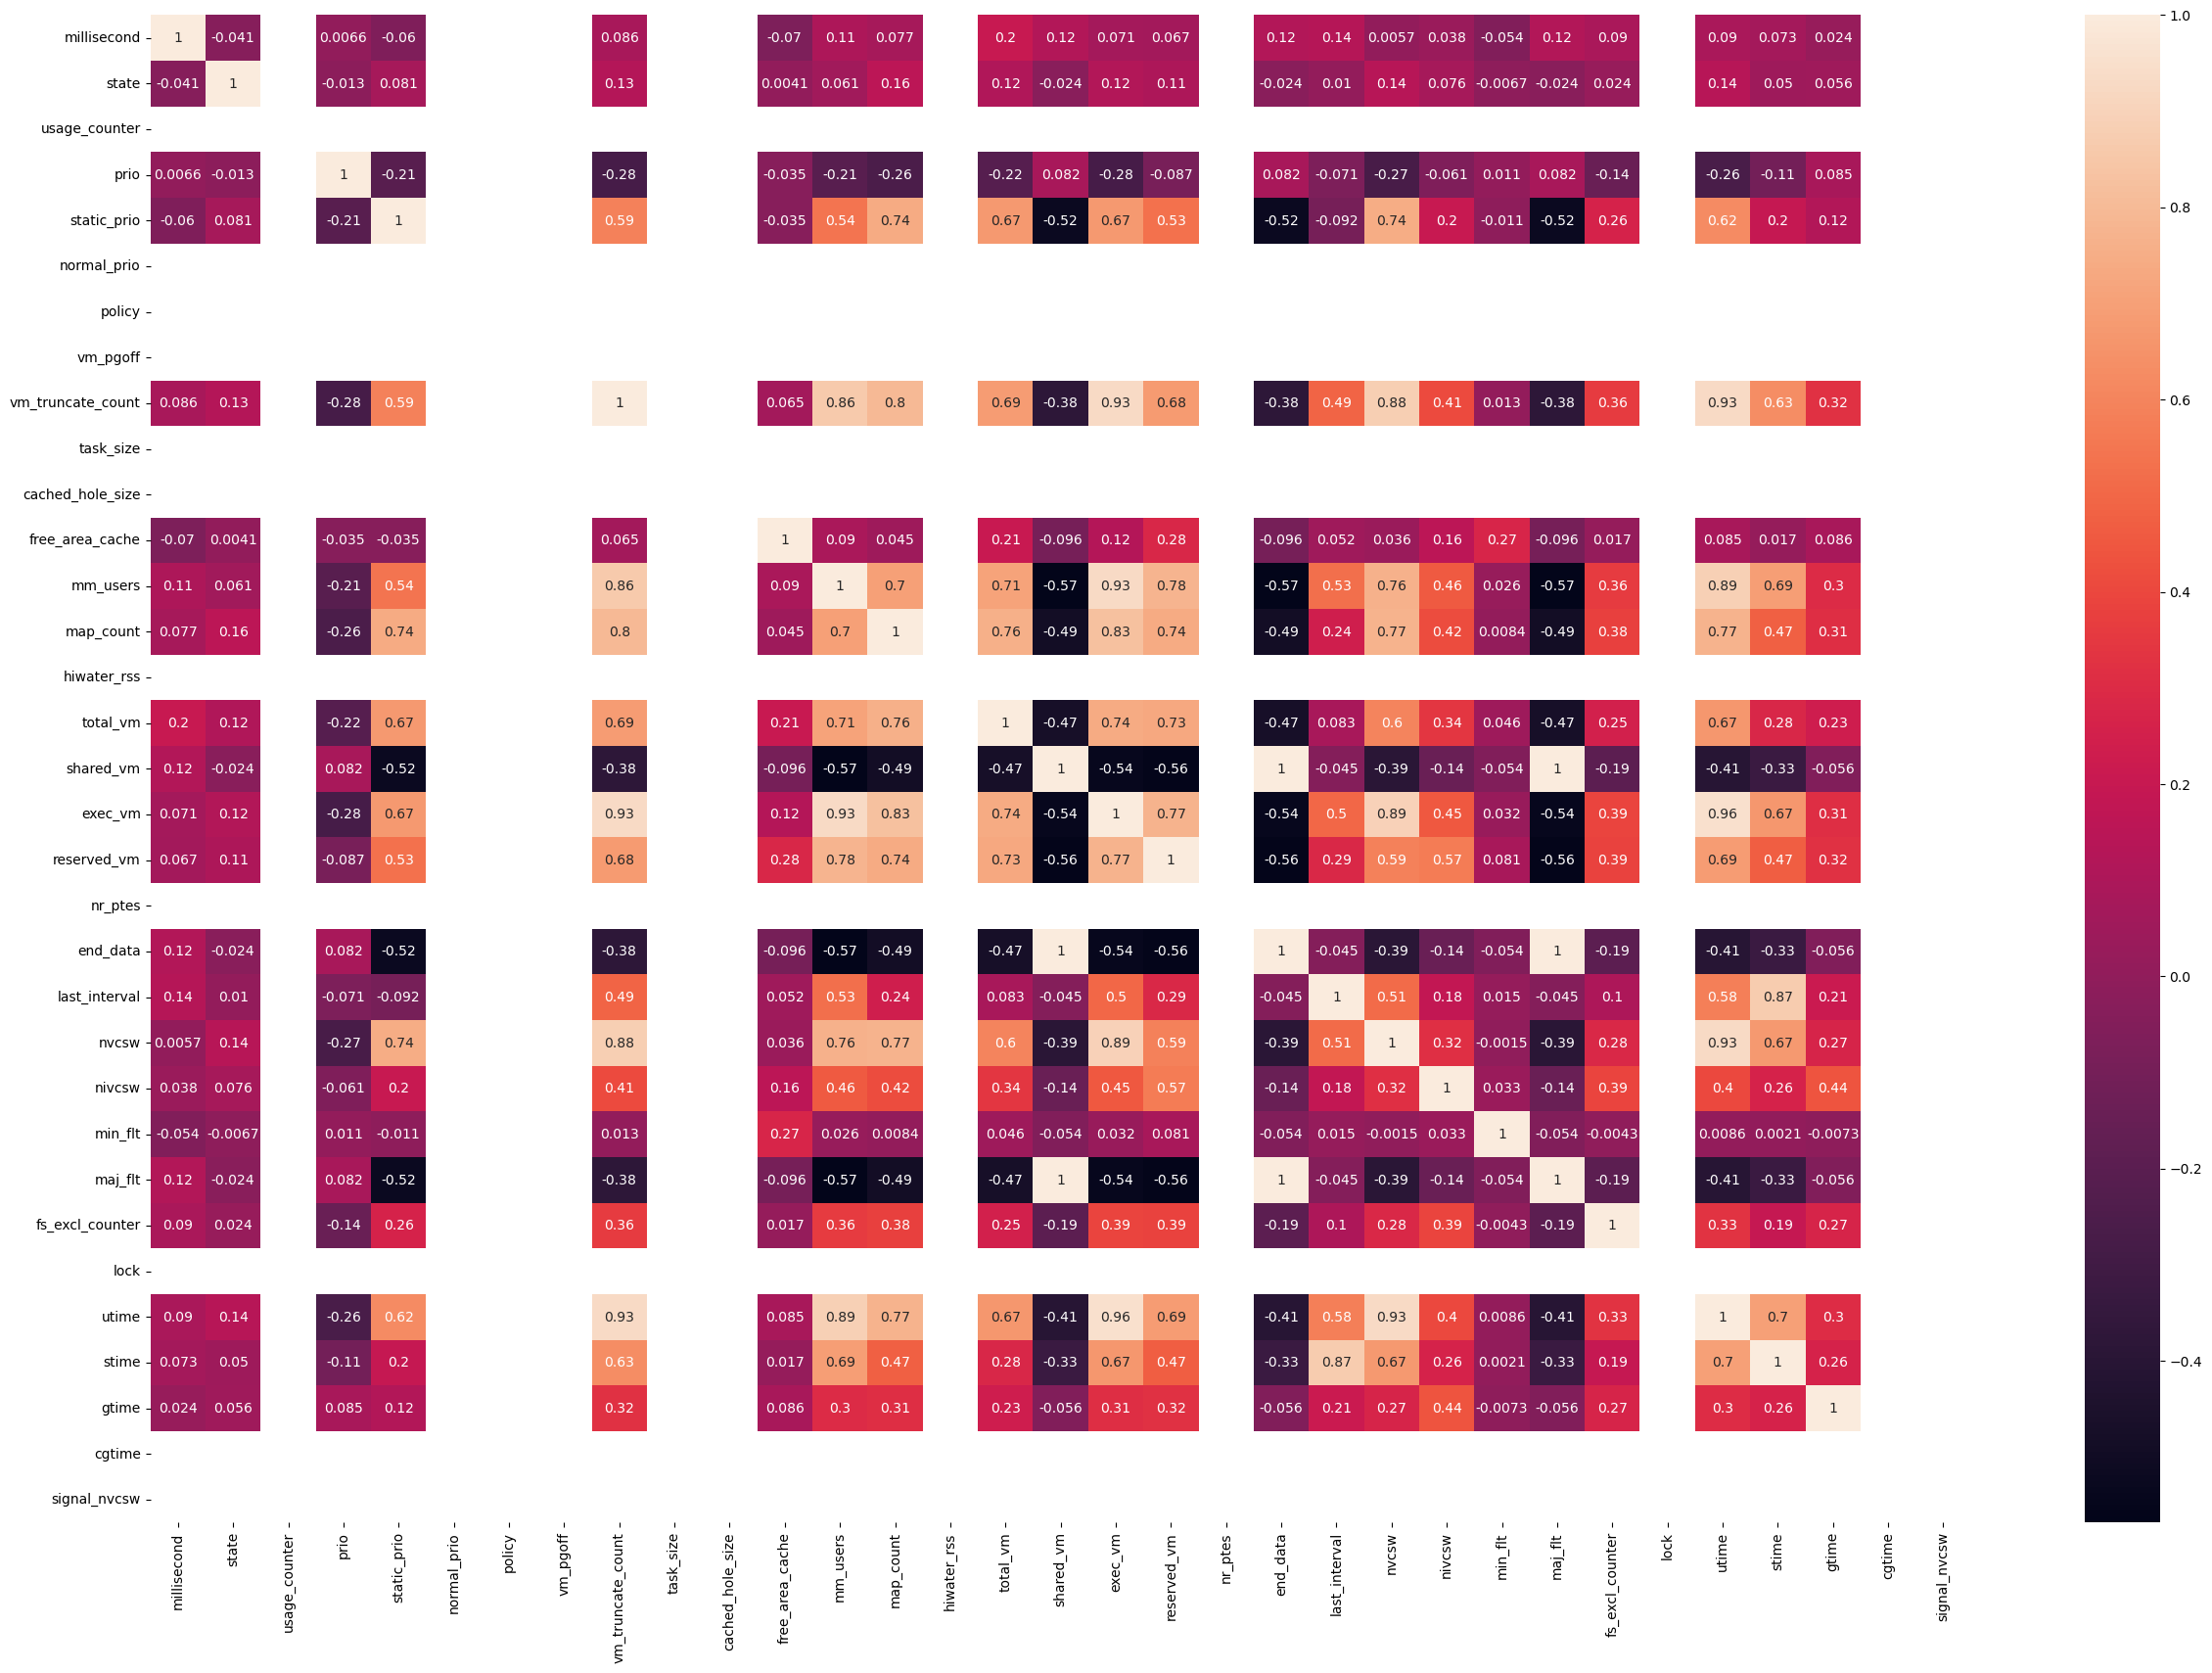

In [13]:
# Checking for colrelation between columns. Heatmap

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only = True), annot = True)

Columns 'maj_fit', 'end_data', and 'shared_vm' are linearly dependent.

In [15]:
# Data preprocessing

# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
  if df[i].dtypes == "object":
    df[i] = le.fit_transform(df[i])

In [16]:
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,28,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,28,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,28,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,28,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,28,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


Explained Variance Ratio: [0.40708425 0.11988412]


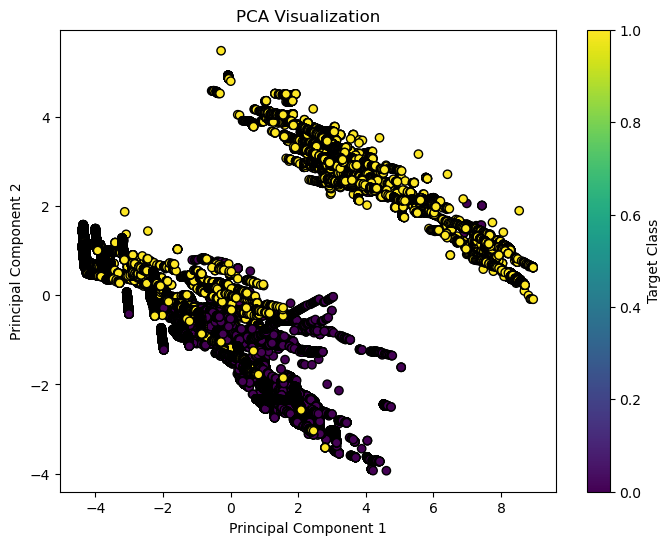

In [17]:
#Applying PCA to reduce dimmension after scaling

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features from the target variable if applicable

X = df.drop('classification',axis=1).to_numpy()
y = df['classification'].to_numpy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# 3. Explained Variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 4. Visualize PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Class')
plt.show()

In [18]:
#2. Load and split the dataset into two parts (training and testing)

#Model Building

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, stratify=y,test_size = 0.20,random_state=100)

[[3886 1625]
 [1212 6153]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      5511
           1       0.79      0.84      0.81      7365

    accuracy                           0.78     12876
   macro avg       0.78      0.77      0.77     12876
weighted avg       0.78      0.78      0.78     12876



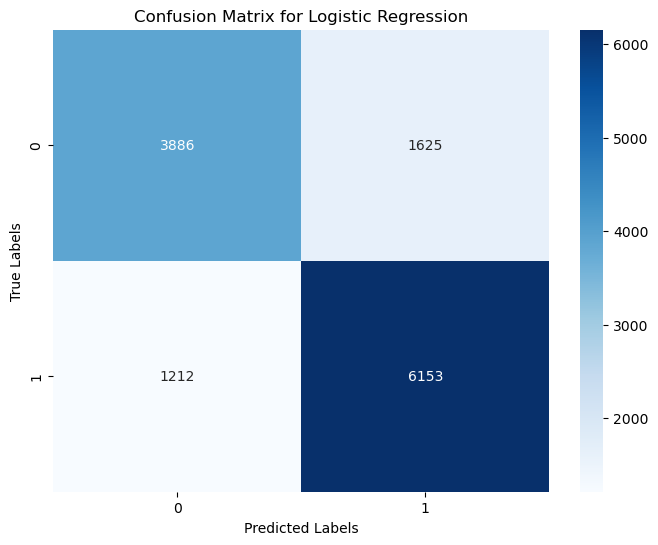

In [19]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


x_train2 = X_train
x_test2 = X_test


for name,method in [('Logistic Regression', LogisticRegression(solver='liblinear',random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


#Confusion matrix Plot:
    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Estimator: Decision Tree
[[5467   44]
 [  58 7307]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5511
           1       0.99      0.99      0.99      7365

    accuracy                           0.99     12876
   macro avg       0.99      0.99      0.99     12876
weighted avg       0.99      0.99      0.99     12876



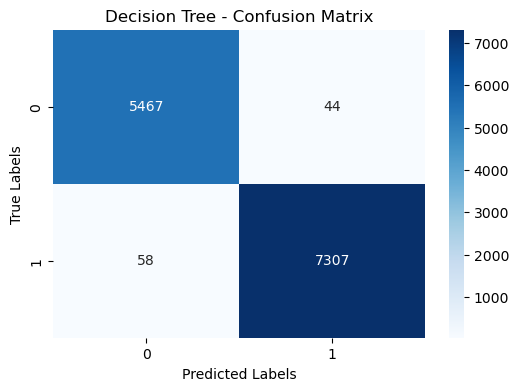

In [20]:
# Decision Tree Model

x_train2 = X_train
x_test2 = X_test

#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

for name,method in [('Decision Tree', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names =target_names))

#Confusion matrix Plot:

    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



Estimator: RF
[[5487   24]
 [  50 7315]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5511
           1       1.00      0.99      0.99      7365

    accuracy                           0.99     12876
   macro avg       0.99      0.99      0.99     12876
weighted avg       0.99      0.99      0.99     12876



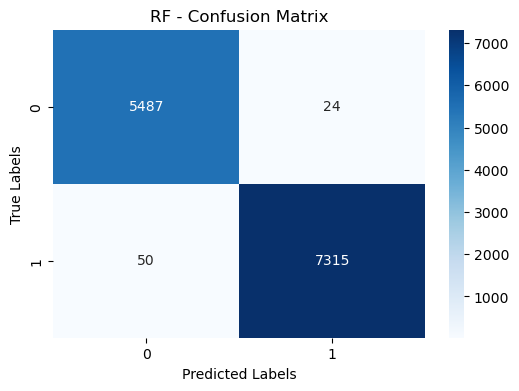

In [21]:
# Random Forest Model

#Script for Random forest
from sklearn.ensemble import RandomForestClassifier  

for name,method in [('RF', RandomForestClassifier(n_estimators = 100, random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))

#Confusion matrix Plot:

    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

[[5301  210]
 [1851 5514]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      5511
           1       0.96      0.75      0.84      7365

    accuracy                           0.84     12876
   macro avg       0.85      0.86      0.84     12876
weighted avg       0.87      0.84      0.84     12876



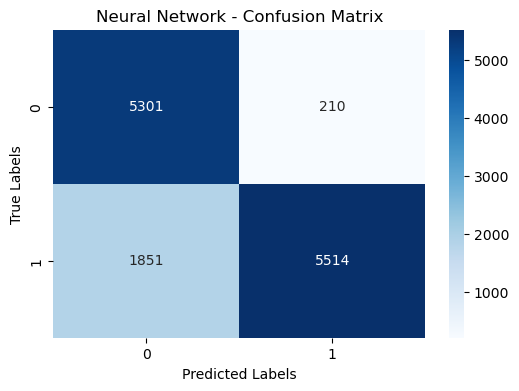

In [22]:
## Neural Networks

#Building Neural Network model
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(5,4,5),max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['0','1']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names))

#Confusion matrix Plot:

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Neural Network - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Optimal Number of Neighbors: 1

Estimator: k-NN
[[5478   33]
 [  43 7322]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5511
           1       1.00      0.99      0.99      7365

    accuracy                           0.99     12876
   macro avg       0.99      0.99      0.99     12876
weighted avg       0.99      0.99      0.99     12876

Execution time: 0.8472 seconds


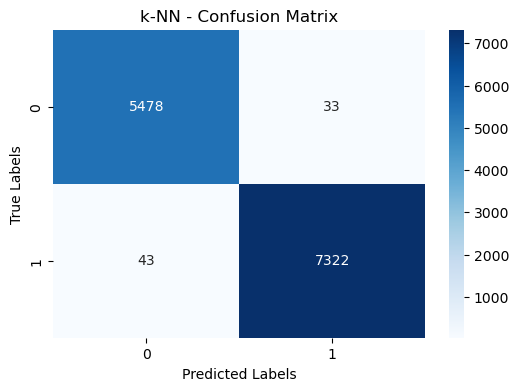

In [55]:
## kNN Model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time



k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train2, y_train, cv=10, scoring='accuracy')
    #append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
    
#Print Best Score (i.e K value)
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]
print('Optimal Number of Neighbors: {}'.format(best_k))

start_bs = time.time()

#Create Optimal KNN model
classifier = KNeighborsClassifier(n_neighbors = best_k)
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('k-NN', classifier)]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


end_bs = time.time()

end_bs = time.time()  # End the timer
execution_bs = end_bs - start_bs
print(f"Execution time: {execution_bs:.4f} seconds")


#Confusion matrix Plot:

cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'{name} - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

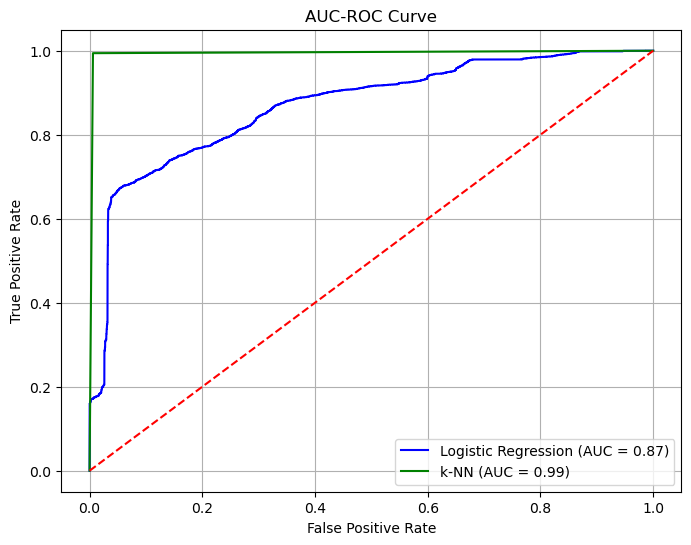

In [53]:
#AUC-ROC Curve for Log reg and kNN
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

logistic_model = LogisticRegression(solver='liblinear', random_state=100)
logistic_model.fit(x_train2, y_train)
logistic_pred = logistic_model.predict(x_test2)
logistic_prob = logistic_model.predict_proba(x_test2)[:, 1]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(x_train2, y_train)
knn_pred = knn_model.predict(x_test2)
knn_prob = knn_model.predict_proba(x_test2)[:, 1]

# AUC-ROC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logistic_prob)
auc_lr = auc(fpr_lr, tpr_lr)

# AUC-ROC for k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot AUC-ROC for Both Models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()